### Classification model based on Loan status, keeping amount duration and payments.

In [12]:
import pandas as pd

In [13]:
df1=pd.read_excel("Master_table_upadated.xlsx")
df1.head()

card_id  disp_id     type  issued MyUnknownColumn  account_id  \
0      159      946  classic  950501        00:00:00         790   
1      159      946  classic  950501        00:00:00         790   
2      159      946  classic  950501        00:00:00         790   
3      159      946  classic  950501        00:00:00         790   
4      159      946  classic  950501        00:00:00         790   

   disp_client_id disp_type  client_id  birth_number  ...  loan_date  \
0             946     OWNER        946        510806  ...     940724   
1             946     OWNER        946        510806  ...     940724   
2             946     OWNER        946        510806  ...     940724   
3             946     OWNER        946        510806  ...     940724   
4             946     OWNER        946        510806  ...     940724   

   loan_amount duration payments  loan_status     type_of-loan  Unnamed: 52  \
0       208128       48     4336            B  high_loan_taker          NaN   
1       208128       48     4336            B  high_loan_taker          NaN   
2       208128       48     4336            B  high_loan_taker          NaN   
3       208128       48     4336            B  high_loan_taker          NaN   
4       208128       48     4336            B  high_loan_taker          NaN   

   payment_type  balance_type  transaction_type  
0   Mid_Payment           NaN            CREDIT  
1   Mid_Payment           NaN            CREDIT  
2   Mid_Payment           NaN            CREDIT  
3   Mid_Payment           NaN            CREDIT  
4   Mid_Payment           NaN            CREDIT  

[5 rows x 56 columns]

In [10]:
df1.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'MyUnknownColumn', 'account_id',
       'disp_client_id', 'disp_type', 'client_id', 'birth_number',
       'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id', 'bank_to',
       'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'frequency', 'trans_id', 'account_id.1', 'date',
       'type.1', 'operation', 'amount.1', 'balance', 'k_symbol.1', 'bank',
       'account', 'loan_id', 'loan_date', 'loan_amount', 'duration',
       'payments', 'loan_status', 'type_of-loan', 'Unnamed: 52',
       'payment_type', 'balance_type', 'transaction_type'],
      dtype='object')

In [14]:
df1.shape

(868, 56)

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='loan_amount', ylabel='duration'>

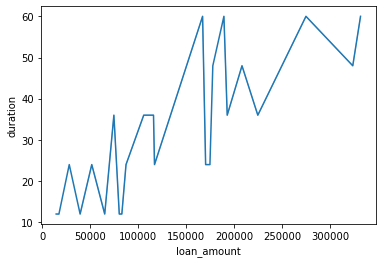

In [16]:
sns.lineplot(data =df,x=df['loan_amount'],y=df['duration'],palette ='rgb')

<AxesSubplot:xlabel='payments', ylabel='duration'>

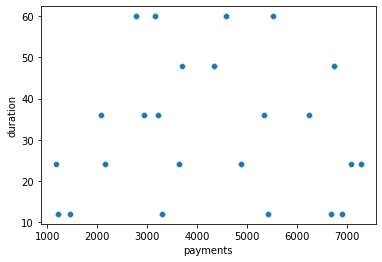

In [18]:
sns.scatterplot(data = df,x=df['payments'],y=df['duration'],palette = 'rgb')

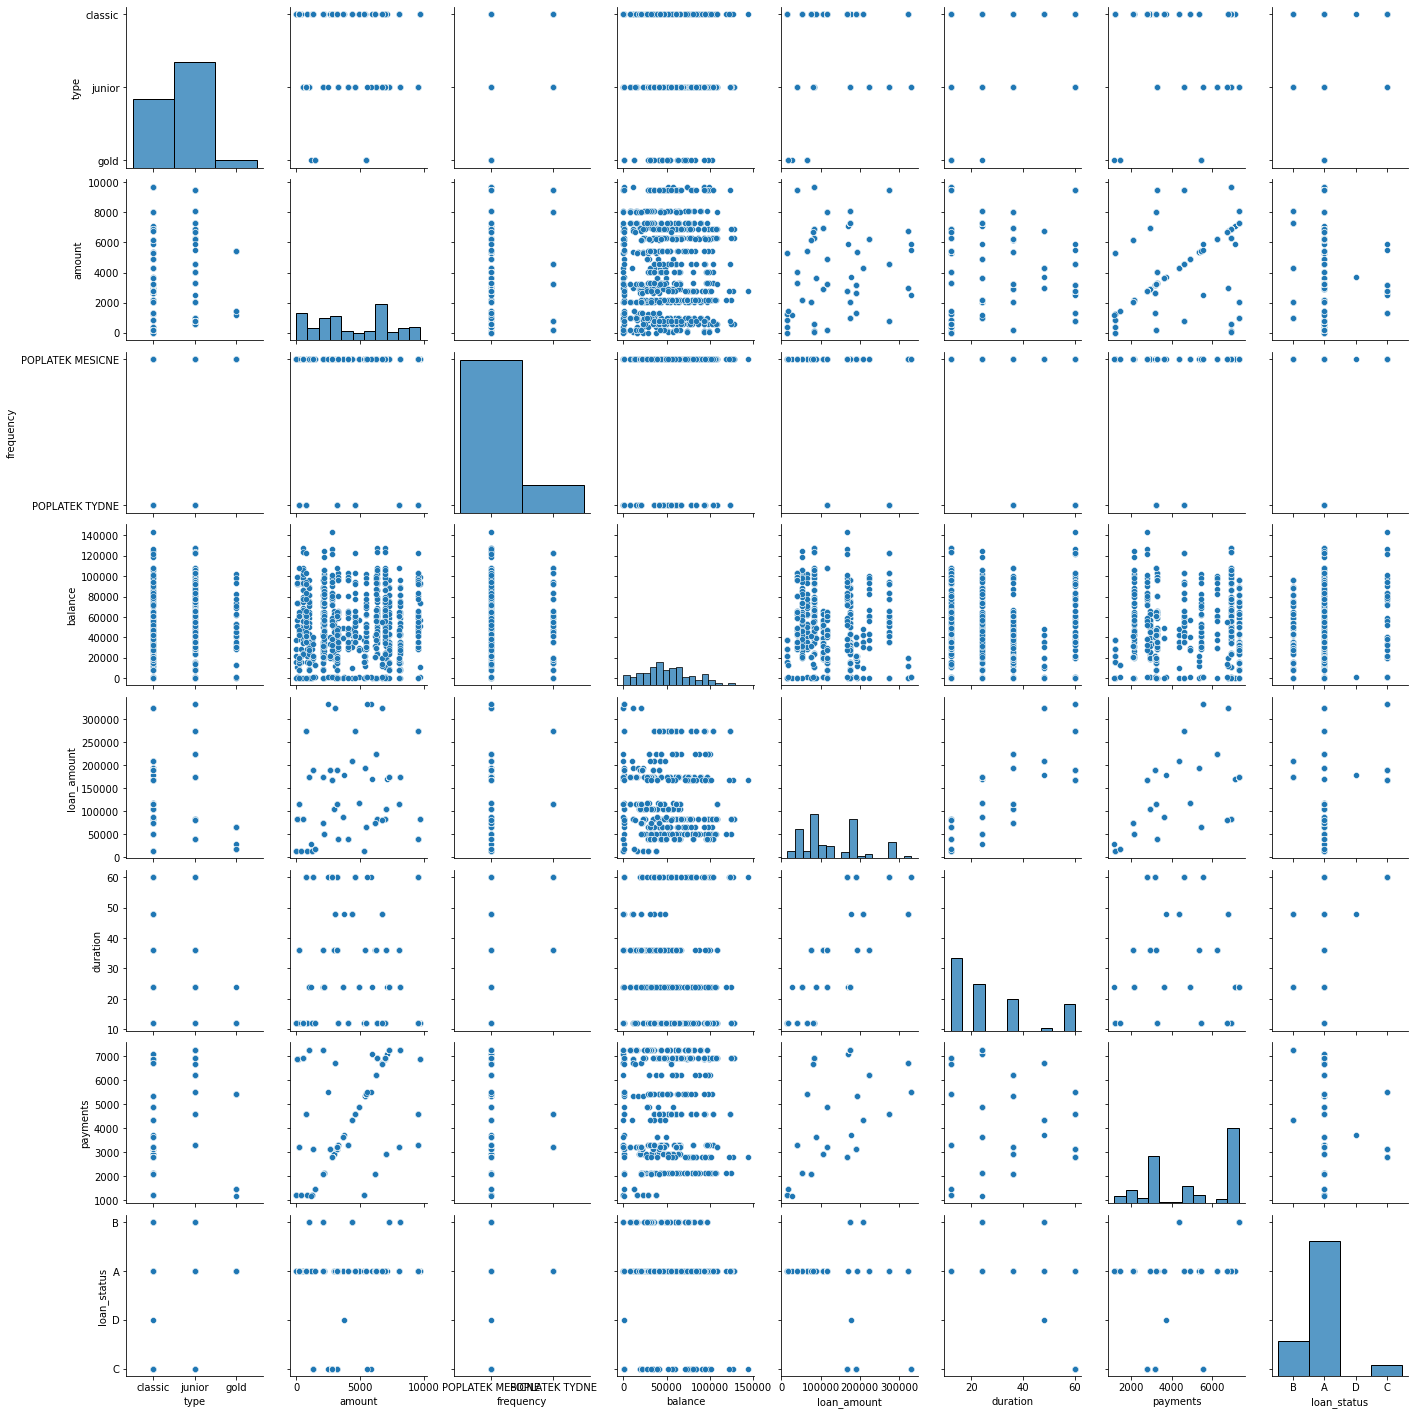

In [22]:
sns.pairplot(df1,vars=['type','amount','frequency','balance','loan_amount','duration','payments','loan_status'])

<AxesSubplot:xlabel='loan_amount', ylabel='payments'>

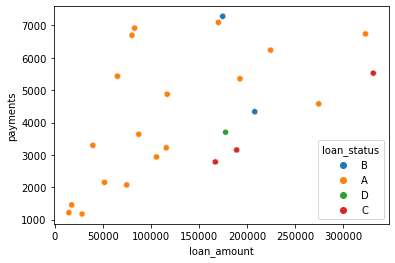

In [23]:
sns.scatterplot(x="loan_amount",y="payments",data=df,hue="loan_status")

<AxesSubplot:xlabel='loan_amount', ylabel='balance'>

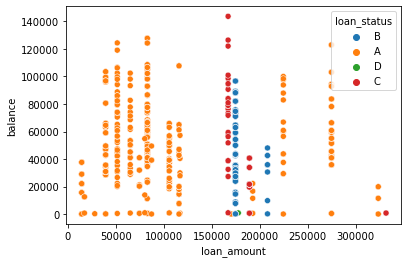

In [25]:
sns.scatterplot(x="loan_amount",y="balance",data=df,hue='loan_status')

C:\Users\Surendra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

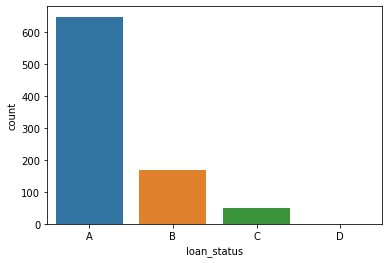

In [28]:
sns.countplot(df['loan_status'],order=df['loan_status'].value_counts().index)

In [30]:
x=df[['loan_amount','duration','payments']]
x.head()

loan_amount  duration  payments
0       208128        48      4336
1       208128        48      4336
2       208128        48      4336
3       208128        48      4336
4       208128        48      4336

In [33]:
y=df[['loan_status']]
y.head()

loan_status
0           B
1           B
2           B
3           B
4           B

In [35]:
y.loan_status.unique()

array(['B', 'A', 'D', 'C'], dtype=object)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=143)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier(n_neighbors=5)

In [42]:
y1=pd.DataFrame(y.loan_status.map({'A':0,'B':1,'C':2,'D':3}),columns=['loan_status'])

In [43]:
y1.head()

loan_status
0            1
1            1
2            1
3            1
4            1

In [44]:
import numpy as np

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(607, 3)
(607, 1)
(261, 3)
(261, 1)


In [46]:
type(x_train)

pandas.core.frame.DataFrame

In [47]:
y_test.reset_index().head()

index loan_status
0    500           A
1    141           A
2    680           A
3    616           C
4    703           A

In [48]:
error_rate2=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    m1=knn.fit(x,y1)
    pr_i=m1.predict(x)
    pr_i=pr_i.reshape(868,1)
    error_rate2.append(np.mean(pr_i!=y1))

C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

In [49]:
error_rate2

[loan_status    0.0
 dtype: float64,
 loan_status    0.001152
 dtype: float64,
 loan_status    0.001152
 dtype: float64,
 loan_status    0.001152
 dtype: float64,
 loan_status    0.003456
 dtype: float64,
 loan_status    0.006912
 dtype: float64,
 loan_status    0.006912
 dtype: float64,
 loan_status    0.006912
 dtype: float64,
 loan_status    0.011521
 dtype: float64,
 loan_status    0.011521
 dtype: float64,
 loan_status    0.011521
 dtype: float64,
 loan_status    0.011521
 dtype: float64,
 loan_status    0.011521
 dtype: float64,
 loan_status    0.011521
 dtype: float64,
 loan_status    0.011521
 dtype: float64,
 loan_status    0.020737
 dtype: float64,
 loan_status    0.020737
 dtype: float64,
 loan_status    0.020737
 dtype: float64,
 loan_status    0.020737
 dtype: float64,
 loan_status    0.020737
 dtype: float64,
 loan_status    0.020737
 dtype: float64,
 loan_status    0.020737
 dtype: float64,
 loan_status    0.020737
 dtype: float64,
 loan_status    0.020737
 dtype: float6

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

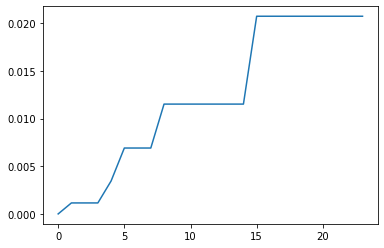

In [51]:
plt.plot(error_rate2)

In [52]:
error_rate=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    m1=knn.fit(x_train,y_train)
    p_i=pd.DataFrame(m1.predict(x_test),columns=y_test.columns)
 
#     print(p_i.head())
    error_rate.append(np.mean(p_i!=y_test.reset_index(drop=True)))

C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

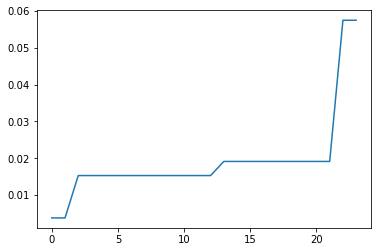

In [53]:
plt.plot(error_rate)

In [54]:
for i in error_rate:
    print(i)

loan_status    0.003831
dtype: float64
loan_status    0.003831
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.015326
dtype: float64
loan_status    0.019157
dtype: float64
loan_status    0.019157
dtype: float64
loan_status    0.019157
dtype: float64
loan_status    0.019157
dtype: float64
loan_status    0.019157
dtype: float64
loan_status    0.019157
dtype: float64
loan_status    0.019157
dtype: float64
loan_status    0.019157
dtype: float64
loan_status    0.019157
dtype: float64
loan_status    0.057471
dtype: float64
loan_status    0.057471
dtype: float64


In [55]:
type(error_rate)

list

#### Since KNN is not giving proper results we opt Random forest Classifier and Decision Tree

### - Random Forest Classifier and Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
dt=DecisionTreeClassifier(criterion='gini')
rf=RandomForestClassifier(criterion='gini')

In [58]:
mDT=dt.fit(x,y)
mRF=rf.fit(x,y)

<ipython-input-58-47af7ea22293>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mRF=rf.fit(x,y)


In [59]:
pred_DT=mDT.predict(x)
pred_RF=mRF.predict(x)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
accuracy_score(pred_DT,y)

1.0

In [62]:
accuracy_score(pred_RF,y)

1.0

In [63]:
m2=dt.fit(x_train,y_train)

In [64]:
p2=m2.predict(x_test)

In [65]:
accuracy_score(y_test,p2)

0.9961685823754789

In [66]:
m3=rf.fit(x_train,y_train)

<ipython-input-66-600e6287bf28>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m3=rf.fit(x_train,y_train)


In [67]:
p3=m3.predict(x_test)

In [68]:
accuracy_score(y_test,p3)

0.9961685823754789

In [69]:
final_ds=pd.concat([df,pd.DataFrame(pred_RF,columns=['Predicted'])],axis=1)

In [70]:
len(pred_RF)

868

In [71]:
final_ds

card_id  disp_id     type  issued MyUnknownColumn  account_id  \
0        159      946  classic  950501        00:00:00         790   
1        159      946  classic  950501        00:00:00         790   
2        159      946  classic  950501        00:00:00         790   
3        159      946  classic  950501        00:00:00         790   
4        159      946  classic  950501        00:00:00         790   
..       ...      ...      ...     ...             ...         ...   
863     1223    13231   junior  950502        00:00:00       11013   
864     1223    13231   junior  950502        00:00:00       11013   
865     1223    13231   junior  950502        00:00:00       11013   
866     1223    13231   junior  950502        00:00:00       11013   
867     1223    13231   junior  950502        00:00:00       11013   

     disp_client_id disp_type  client_id  birth_number  ...  loan_amount  \
0               946     OWNER        946        510806  ...       208128   
1               946     OWNER        946        510806  ...       208128   
2               946     OWNER        946        510806  ...       208128   
3               946     OWNER        946        510806  ...       208128   
4               946     OWNER        946        510806  ...       208128   
..              ...       ...        ...           ...  ...          ...   
863           13539     OWNER      13539        780907  ...       274740   
864           13539     OWNER      13539        780907  ...       274740   
865           13539     OWNER      13539        780907  ...       274740   
866           13539     OWNER      13539        780907  ...       274740   
867           13539     OWNER      13539        780907  ...       274740   

     duration payments loan_status     type_of-loan  Unnamed: 52  \
0          48     4336           B  high_loan_taker          NaN   
1          48     4336           B  high_loan_taker          NaN   
2          48     4336           B  high_loan_taker          NaN   
3          48     4336           B  high_loan_taker          NaN   
4          48     4336           B  high_loan_taker          NaN   
..        ...      ...         ...              ...          ...   
863        60     4579           A  high_loan_taker          NaN   
864        60     4579           A  high_loan_taker          NaN   
865        60     4579           A  high_loan_taker          NaN   
866        60     4579           A  high_loan_taker          NaN   
867        60     4579           A  high_loan_taker          NaN   

     payment_type  balance_type  transaction_type  Predicted  
0     Mid_Payment           NaN            CREDIT          B  
1     Mid_Payment           NaN            CREDIT          B  
2     Mid_Payment           NaN            CREDIT          B  
3     Mid_Payment           NaN            CREDIT          B  
4     Mid_Payment           NaN            CREDIT          B  
..            ...           ...               ...        ...  
863   Mid_Payment           NaN         WITHDRWAL          A  
864   Mid_Payment           NaN         WITHDRWAL          A  
865   Mid_Payment           NaN         WITHDRWAL          A  
866   Mid_Payment           NaN         WITHDRWAL          A  
867   Mid_Payment           NaN         WITHDRWAL          A  

[868 rows x 57 columns]

In [72]:
final_ds.shape

(868, 57)

C:\Users\Surendra\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Surendra\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Surendra\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Surendra\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


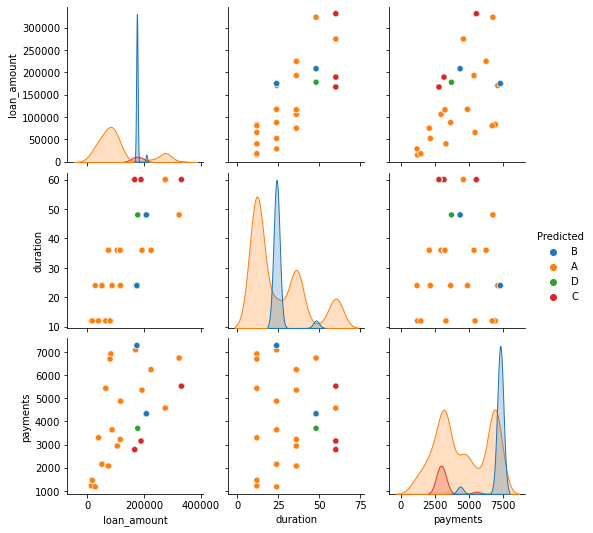

In [73]:
sns.pairplot(final_ds,vars=['loan_amount','duration','payments'],hue='Predicted')

In [74]:
### - Logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
log=LogisticRegression()

In [77]:
modelLR=log.fit(x_train,y_train)

C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [78]:
predict=modelLR.predict(x_test)

In [79]:
accuracy_score(predict,y_test)

0.7279693486590039